In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('student-mat.csv', sep=';')
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

Mean Final: 10.415189873417722
Mean First: 10.90886075949367
Mean Second: 10.713924050632912
Mean Final Males: 10.914438502673796
Mean Final Females: 9.966346153846153
Males: 187
Females: 208


Text(0.5, 1.0, 'Average Grades')

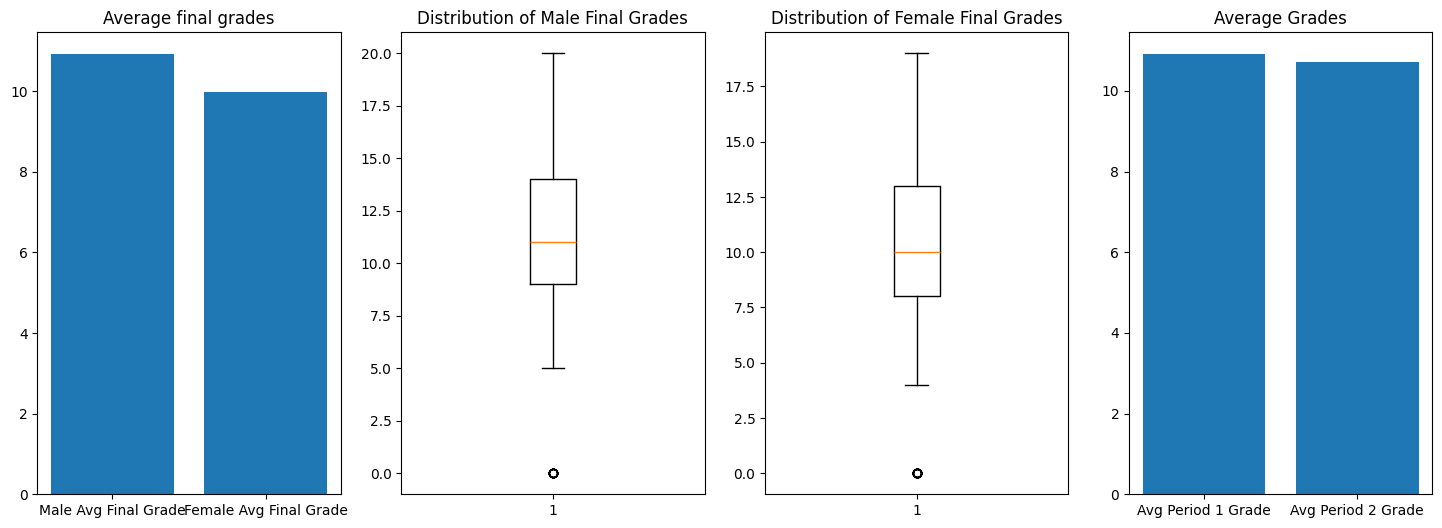

In [45]:
mean_final = df['G3'].mean()
mean_first = df['G1'].mean()
mean_second = df['G2'].mean()
print(f'Mean Final: {mean_final}\nMean First: {mean_first}\nMean Second: {mean_second}')

mean_final_m = df.loc[df['sex'] == 'M', 'G3'].mean()
mean_final_f = df.loc[df['sex'] == 'F', 'G3'].mean()
print(f'Mean Final Males: {mean_final_m}\nMean Final Females: {mean_final_f}')
males = df.loc[df['sex'] == 'M', 'G3'].count()
females = df.loc[df['sex'] == 'F', 'G3'].count()
print(f'Males: {males}\nFemales: {females}')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6))

ax1.bar(['Male Avg Final Grade', 'Female Avg Final Grade'], [mean_final_m, mean_final_f])
ax1.set_title('Average final grades')
ax2.boxplot(df.loc[df['sex'] == 'M', 'G3'])
ax2.set_title('Distribution of Male Final Grades')
ax3.boxplot(df.loc[df['sex'] == 'F', 'G3'])
ax3.set_title('Distribution of Female Final Grades')
ax4.bar(['Avg Period 1 Grade', 'Avg Period 2 Grade'], [mean_first, mean_second])
ax4.set_title('Average Grades')

#### Hypothesis 1: Males at this school do better in the classes than females. Aka there is a statistically significant difference in the grades between males and females. 
- Our hypothesis is Males getting better grades than Females because the average male grade is higher than the average female grade.

#### Hypothesis 2: Students put more effort into their classes in the first period than in the second period. Aka there is a statistically significant difference in the first period grades and second period grades.
- Our hypothesis is students putting in more effort in the first period because the average grade in Period 1 is higher than the average grade in period 2

For both these t tests we will be using a p-value of .05

In [41]:
male_finals = df.loc[df['sex'] == 'M', 'G3'].tolist()
female_finals = df.loc[df['sex'] == 'F', 'G3'].tolist()
first_grades = df['G1'].tolist()
second_grades = df['G2'].tolist()

_, p_value_sex = stats.ttest_ind(male_finals, female_finals, equal_var=True)
_, p_value_period = stats.ttest_ind(first_grades, second_grades, equal_var=True)

print(f'Sex p-value: {p_value_sex}\nPeriod p-value: {p_value_period}')

Sex p-value: 0.039865332341527636
Period p-value: 0.4401690624225727


#### Hypothesis 1: True, since the p-value of .0399 is < .05 we can reject the null hypothesis and say that Males get better grades than females.

#### Hypothesis 2: False, since the p-value of .4402 is > .05 we fail to reject teh null hypothesis that the difference in the average grade between period 1 and period 2 was due to random chance.